<a href="https://colab.research.google.com/github/python1999e/photon54/blob/main/02_data_analysis_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://github.com/python1999e/photon54/blob/main/images/Practicum_AI_Logo.white_outline.svg?raw=1' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_python.png?raw=true' align='right' width=50>
***

# Data Analysis with pandas
In this module, you will learn about one of the most popular and valuable Python libraries for data analysis and manipulation: ***pandas***!

<img src='https://github.com/python1999e/photon54/blob/main/images/pandas_logo.png?raw=1' alt='The pandas logo' align='center' width=200>

### After this module, students will be able to:
* Explain the various components of a pandas DateFrame.
* Use `read_csv()` to create new DateFrames from data.
* Subset data with pandas index and DateFrame management functions.
* Use basic statistical functions to summarize a dataset.
* Use matplotlib functions to generate clear graphs and plots.


## <img src='https://github.com/python1999e/photon54/blob/main/images/get_started_icon.svg?raw=1' alt="Let's get started header" width=40 align=center> Let's Get Started!

As we learned in the last module, we must **import** the pandas library before we can use it.
* We'll also import the scientific computing library NumPy for illustration purposes.
* NumPy and pandas are usually imported with abbreviated aliases, `np` and `pd`.

In [ ]:
import numpy as np
import pandas as pd

## pandas Dataframes

pandas provides one of the most useful data structures for managing data: the DataFrame.

**DataFrames:**

* Allow fast, flexible, and efficient data manipulation.
* Are the natural data structure for **tabular** data.
* Are two-dimensional, containing both **rows** and **columns**.
* Consist of one or more **Series** (as columns).


***pandas*** is built on top of the **NumPy** library, which in practice means that most of the methods defined for NumPy Arrays apply to pandas Series/DataFrames.

**What makes pandas so useful for working with data?**
1. Powerful and efficient interface to access and manipulate individual records.
2. Tools for handling missing values and explicit values for missing data (`NaN` and `None`).
3. Relational database-style operations between DataFrames.

### <img src='https://github.com/python1999e/photon54/blob/main/images/note_icon.svg?raw=1' alt="Note icon" width=40 align=center> Note
> Some of the examples used in this notebook are different from those used in the corresponding video.

## Creating a Series

Let's start by creating our first pandas Series! (Remember: in the context of a **DataFrame** (table), each column is represented by a **Series**).

First, let's create some example data to illustrate the creation of our Series. in this example, we will use data that relates a person's "SpO2" reading from a pulse oximeter (which shows the percentage of oxygen in someone's blood), and their risk of adverse outcomes.

In [ ]:
spo2 = [88, 99, 88, 85, 100, 98] # Review: this is a Python list, containing 6 values.
risk = ['high', 'low', 'high', 'high', 'low', 'low']

In [ ]:
# Create our first Series.
spo2_series = pd.Series(spo2)
spo2_series # If a variable name is the last line in a code cell, Jupyter will display the contents of the variable.

In [ ]:
# Do the same for risk.
pd.Series(risk) # Display the 'risk' Series

### <img src='https://github.com/python1999e/photon54/blob/main/images/alert_icon.svg?raw=1' alt="Alert icon" width=40 align=center> Alert!
> An important point to remember is that Python is "zero-indexed." That means that the first item in a list, or the first row in a table, has the index of 0.
>
> Notice the output above. The first column shows the Series index, and the second column has the value. The indices start at 0!
>
> This applies to lists, strings, arrays, and almost everything in Python. Keep this in mind--a common error is mistakenly using index 1, thinking you are getting the first item, where you need to use index 0.


## Creating a pandas Dataframe

* Now that we've seen a Series, we can see how these are combined as **columns** in a **DataFrame**.
* By popular convention, we will name our DataFrame variable `df`.

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
> Create a small DataFrame from our example data.

In [ ]:
df = pd.DataFrame({'spo2': spo2, 'risk': risk}) # Create the DataFrame
df # View the DataFrame

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
> Create a larger DataFrame from random data.

In [ ]:
# Make some random numbers for data.
# This makes an array of random integers from 1-10, then reshapes it into a
# 500x4 matrix (500 rows and 4 columns).
random_data = np.random.randint(1,10, size=2000).reshape(500, 4)

# Create some example column names
column_names = ['columnA', 'columnB', 'columnC', 'columnD']

# Create the DateFrame from the random data we generated.
# Since the input matrix has 500 rows and 4 columns, the DataFrame will have
# 500 rows and 4 columns.
df = pd.DataFrame(data=random_data, columns=column_names)
df # View the DataFrame.

### <img src='https://github.com/python1999e/photon54/blob/main/images/note_icon.svg?raw=1' alt="Note icon" width=40 align=center> Note
> When viewing a large DataFrame in a Jupyter notebook, sometimes the data will be **truncated** as above.

We often want to see the first (or last) several rows of a DateFrame. We can use the `head()` and `tail()` functions.

In [ ]:
# View the 1st 5 rows.
df.head()

In [ ]:
# View the last 3 rows (head also takes a number of rows as an optional
# argument).
df.tail(3)

We can also limit our views to particular columns using the column names. If the column names have no spaces or special characters, we can use the "dot" notation: `df.columnA`. Otherwise, we must pass a list of columns: `df[['columnA', 'columnB']]`.

In [ ]:
# View multiple columns or if there are spaces in names
# Note the double square brackets!
df[['columnA', 'columnB']].head()

# Creating a DataFrame from an existing data file

* Instead of creating a DataFrame from scratch (tedious!), we usually create a DataFrame by loading an existing data file.
* The most common file format for storing datasets is the **comma-separated value** `(.csv)` file.

> To create a pandas DataFrame from a `.csv` file, we'll use the `read_csv` function.

### Let's load some data

The main input argument to the `read_csv` function can be a local filename or a remote file URL. In this example, we'll be using an online file.

### <img src='https://github.com/python1999e/photon54/blob/main/images/note_icon.svg?raw=1' alt="Note icon" width=40 align=center> Note
> For information on how to upload a file into Jupyter, see the [handout](handouts/uploading-and-loading-a-CSV.pdf) (in the handouts folder). This works for single, relatively small files (under 1 or 2GB).

The dataset used is from the [GapMinder Project](https://www.gapminder.org/) and includes information on GDP, life expectancy, and population in various countries for different years.

In [ ]:
url='https://raw.githubusercontent.com/PracticumAI/python-for-ai/main/data/gapminder_all.csv' # Direct link to the dataset on GitHub
df = pd.read_csv(url) # Create the DataFrame from the given URL
df # View the DateFrame we just created

We can see that this dataset contains 142 rows and 38 columns corresponding to each country's GDP, life expectancy, and population between 1952 and 2007.

### <img src='https://github.com/python1999e/photon54/blob/main/images/note_icon.svg?raw=1' alt="Note icon" width=40 align=center> Note
> Stop for a second here. What happened to the variable `df` we defined for our SpO2 data?


## Viewing parts of a Dataframe
* Dataframes often hold many rows (in many AI projects, you might be dealing with hundreds of thousands, or even millions, of samples!)
* Sometimes, we want a preview or a sense of the data stored in our DataFrame.
* In the below examples, we'll see a few ways to view parts of a DataFrame.
    * This includes viewing a subset of columns, a subset of rows, or both.

With so many columns, it can be a bit hard to see all of them, but we can get a list of the columns in the DataFrame with the `.columns` method:

In [ ]:
df.columns

Next, let's revisit viewing some of a DataFrame's **rows**. Since pandas is so flexible, there are several ways to accomplish this. The examples below use the pandas' functions `head` and `tail`.

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 1

> Use `head` to view the first 5 rows of our `df` DataFrame. (**Hint:** Given a DataFrame `X`, calling `X.head()` will show the first `5` rows of the DataFrame.  

In [ ]:
# View only the first 5 rows of the DateFrame.
# Your code here

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 2
> Use `head` to view the first **10** rows of `df`. (**Hint:** You can also provide an input argument `n` to the `head` function to show the first `n` rows (instead of the default `5` rows)).

In [ ]:
# View only the first 10 rows of the DataFrame.
# Your code here

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 3
> Use `tail` to view the **last** 5 rows of our `df` DataFrame. (**Hint:** Given a DateFrame `X`, calling `X.tail()` will show the **last** `5` rows of the DateFrame).  

In [ ]:
# View the last 5 rows of the DataFrame.
# Your code here

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 4
> Use `tail` to view the **last** `10` rows of `df`. (**Hint:** You can also provide an input argument `n` to the `tail` function to show the last `n` rows (instead of the default `5` rows)).

In [ ]:
# View only the last 10 rows of the DateFrame.
# Your code here

Now, let's see some ways to view a subset of a DateFrame's **columns**.

**Reminder:** If the last line inside a code cell is simply a variable name, Jupyter will display the value of that variable.

For a given DateFrame `df` and desired column `col`, one way to view a single column is to write `df['col']`. (**Important:** the column name `col` must be in quotes!).

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 5
> Use the above method to view the `gdpPercap_2007` column of our `df` DateFrame.

In [ ]:
# View the gdpPercap_2007 column of the DateFrame.
# Your code here

We can also adapt this method to view multiple columns. Instead of passing in a single string column name `'C'`, we will pass in a **list** of string column names, e.g. `['A', 'B', 'C']`. For example: `df[['A', 'B', 'C']]`

### <img src='https://github.com/python1999e/photon54/blob/main/images/note_icon.svg?raw=1' alt="Note icon" width=40 align=center> Note
> **Important:** Notice the double brackets! DataFrames use a similar syntax as lists. To get a single column, we can use the column's name: e.g., `df['A']` would give us column A. Here, we want multiple columns, so a list of column names is provided.

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 6
> Use the above method to view the `gdpPercap_2007`, `lifeExp_2007`, and `pop_2007` columns of our `df` DateFrame.

In [ ]:
# Display the columns `gdpPercap_2007`, `lifeExp_2007`, and `pop_2007`
# Your code here


## Creating new columns

* We can easily create new columns in an existing DateFrame.
* When we use mathematical operations as below, they will be applied to every element of the Series.
* This way, we can create new columns from different combinations of existing ones.

Let's use an equation to calculate the change in GDP from 1962 to 2007.

In [ ]:
df['gdp_change'] = (df['gdpPercap_1962'] - df['gdpPercap_2007'])
df.head()

## Deleting columns

We can also **drop** (delete) columns.

Let's remove the `gdp_change` column that we previously created.

In [ ]:
df.drop(columns=['gdp_change']) # Will this remove the column?
df.head()

**What happened? `gdp_change` is still there!**

### <img src='https://github.com/python1999e/photon54/blob/main/images/tip_icon.svg?raw=1' alt="Tip icon" width=40 align=center> Tip
> Unless you specify `inplace=True` or assign the DateFrame back to itself (or a different variable name), **the `drop` method does not change the original DateFrame!**

Below is one way to permanently remove a column from a DateFrame by assigning the result to a new DateFrame variable `df2`.

In [ ]:
# After dropping the column, we assign the resulting DateFrame to a new variable.
# This will persist the change.
df2 = df.drop(columns=['gdp_change'])
df2.head()

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 7

> Create a new DateFrame called `df3`, that contains everything in the `df` DateFrame **except** the `continent` column.

In [ ]:
# Code it!


## Descriptive Statistics

### <img src='https://github.com/python1999e/photon54/blob/main/images/alert_icon.svg?raw=1' alt="Alert icon" width=40 align=center> Alert!
> Before diving into an AI project, becoming familiar with the data you will be modeling is critical!  pandas has an extensive collection of optimized methods designed to help you analyze your data.

A preliminary data discovery and exploration phase can help you better understand the data you will be modeling and has many downstream advantages:
* You may identify potential problems with the dataset (e.g., missing values, outliers, incomplete columns, irrelevant information).
* Results of data exploration may help you decide which preprocessing or modeling approach to take.
* A better understanding of your dataset will help you interpret future results.

#### Remember Python functions?
pandas offers many **functions** that take as **input** a set of values (example: all of the values from the `gdpPercap_2007` column) and **return** a calculated **output** value based on which function was used.

Here are a few examples (most are self-explanatory!):
* `sum` (the sum of the values)
* `count` (the number of values), `value_counts` (the number unique values)
* `min` (the minimum value), `max` (the maximum value)
* `mean` (the mean value), `median` (the median value), `mode` (the mode of the values)
* `var` (the variance of the values), `std` (the standard deviation of the values)
* `quantile` (the quantiles of the values)

Let's take a look at a few examples using our dataset!

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
Here's how we can compute the **mean** GDP in 2007:

In [ ]:
# Compute the mean GDP in 2007
df['gdpPercap_2007'].mean()

It's that easy! Let's compute a few more descriptive statistics:

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 8
> Compute the **minimum** GDP in 2007.

In [ ]:
# Compute the minimum GDP in 2007
# Your code here

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 9
> Compute the **maximum** GDP in 2007.

In [ ]:
# Compute the maximum GDP in 2007
# Your code here

Finally, the `describe` function can be used on an entire DateFrame to display several standard statistics computed for each column. (**Note:** Be aware of each column's values and data types, as sometimes the statistics will not make sense.)

In [ ]:
# (Almost) everything, (almost) everywhere, all at once
# Note: will only compute statistics for columns with numerical data.
df.describe()

## Filtering data
pandas makes it easy to select, analyze, and process subsets of your data based on some criteria, `C`. This is accomplished with the syntax: `df[C]`, which will return a subset of DateFrame `df` that **matches** the criteria `C` listed inside brackets `[]`.

### Comparing values
In pandas, we can create filtering criteria using familiar mathematical operators to compare values:
* `>`: greater than
* `<`: less than
* `>=`: greater than or equal to
* `<=`: less than or equal to
* `!=`: is not equal to
* `==`: is equal to a single value
* **Bonus:** `.isin(L)`: equals any value in the list `L`

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
Display 2007 GDP is **greater** than $40,000.
* In this example, the criterion `C` is `df['gdpPercap_2007'] > 40000`.
* Recall the pandas filtering syntax: `df[C]`.
* So, this is what we want: `df[df['gdpPercap_2007'] > 40000]`.

In [ ]:
# Select rows where 2007 GDP is greater than $40,000
df[df['gdpPercap_2007'] > 40000]

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 10
> Display where 2007 GDP is **less** than $500

In [ ]:
# Display rows where 2007 GDP is less than $500

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
Display the first 5 rows for African countries.

* Recall that the symbol `==` will check for equality (we want the continent to be equal to the single value `Africa`).
* In this example, the criterion `C` is `df['continent] == 'Africa'`.
* Given the pandas filtering syntax: `df[C]`, this is what we want: `df[df['continent'] == 'Africa']`.

In [ ]:
# Display the first 5 rows for African countries.
df[df['continent'] == 'Africa'].head()

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 11
> Display the first 5 rows for European countries (`'continent'`==`'Europe'`).

In [ ]:
# Display the first 5 rows for European countries ('continent'=='Europe').
# Write your code here


### Combining multiple criteria

Multiple criteria can be combined using either the `&` or `|` symbols:
* C1 `&` C2: This will select rows that match **both** criterion C1 **and** criterion C2.
* C1 `|` C2: This will select rows that match **either** criterion C1 **or** criterion C2.

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
Display rows where 2007 GDP is greater than or equal to 30,000 and 2007 life expectancy is under 60. In this example, we have two criteria:
* C1: `df['gdpPercap_2007'] >= 30000`
* C2: `df['lifeExp_2007'] < 60`

In [ ]:
# Select rows where 2007 GDP is greater than or equal to 30,000 and 2007 life expectancy is under 60.
df[(df['gdpPercap_2007'] >= 30000) & (df['lifeExp_2007'] < 60)]

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 12
> Display all European countries that have 2007 life expectancies over 80.

In [ ]:
# Display all European countries that have 2007 life expectancies over 80.
# Your code here



### Analyzing filtered data
We can also perform our descriptive statistics on a filtered subset!

In [ ]:
df[(df['continent'] == 'Europe') & (df['lifeExp_2007'] > 80)].describe()

## Data visualization

Let's conclude this lesson by learning how pandas can enhance our understanding of a dataset with its many built-in visualization tools.

Let's see the data! This time, we'll load our dataset into a DateFrame variable named `X`.

> ![A hand icon](https://github.com/python1999e/photon54/blob/main/images/hand.png?raw=1) Wait! `X`?? Didn't we say to avoid single-letter variable names and generally use lowercase?? Well...rules are...there to be broken when there is a good reason. In much of machine learning and AI, we work with datasets where we want to make a model to generate a prediction. Part of the goal is to take input data and predict an output or outcome. Thinking of a graph with `x`- and `y`-values, we can think of the `x`-value as an input and the `y`-value as the outcome. So, `x` and `y` make sense as variable names when thinking about values on a graph and datasets more generally. Going further, we borrow a convention from math, where a matrix (or a table with several columns) is referenced with a capital letter. Since our DataFrame has multiple columns, we will use the capital X for the name.
>
> We also want to ensure you understand that while we frequently use `df` for a DataFrame variable name, `df` is just a name, and nothing is special about it.

In [53]:
X = pd.read_csv(url) # url is defined above
X.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
Let's visually examine the distribution of 2007 GDPs with the pandas `hist` (histogram) function.

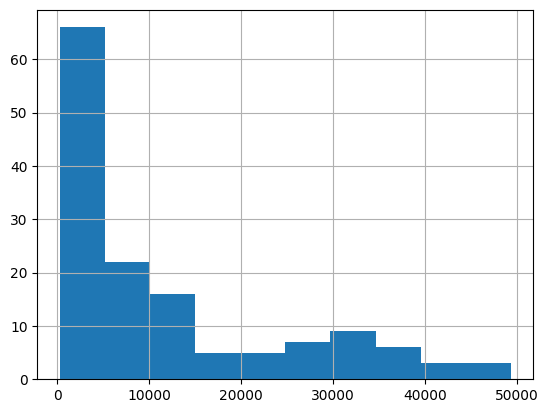

In [54]:
hist = X['gdpPercap_2007'].hist()

We can modify many parameters of the `hist` function to create a more informative figure.

<Axes: title={'center': 'Distribution of 2007 GDP of Countries'}, xlabel='GDP in 2007', ylabel='Count'>

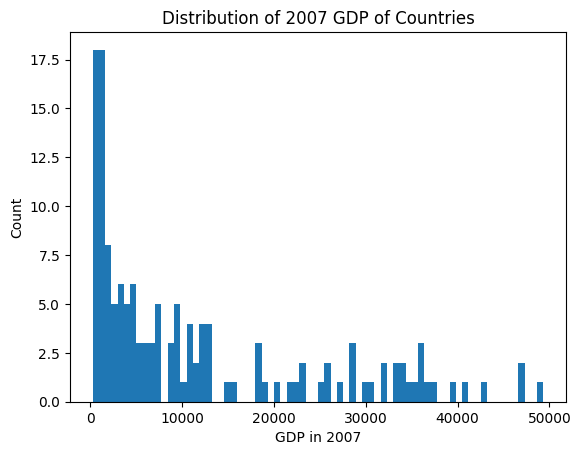

In [55]:
hist = X['gdpPercap_2007'].hist(bins=72, grid=False)
hist.set_title('Distribution of 2007 GDP of Countries')
hist.set_ylabel('Count')
hist.set_xlabel('GDP in 2007')
display(hist)

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 13
> Visualize the distribution of the 2007 life expectancies.

In [56]:
# Visualize the distribution of the 2007 life expectancies.
# Your code here


This can also be written as: `X.hist(['lifeExp_2007'], bins=40)`

That syntax makes it easier to plot multiple histograms side-by-side. Below, we compare the distributions of life expectancies in 1962 and 2007.

array([[<Axes: title={'center': 'lifeExp_1962'}>,
        <Axes: title={'center': 'lifeExp_2007'}>]], dtype=object)

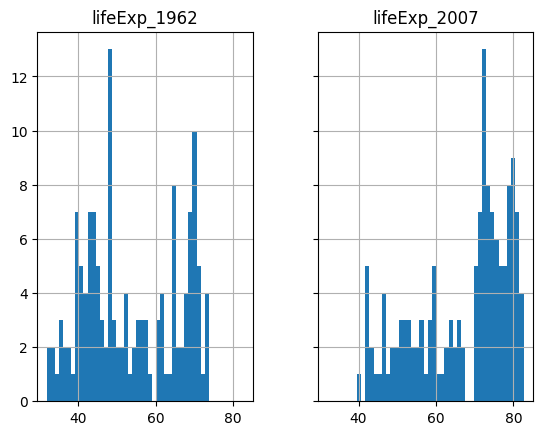

In [57]:
X.hist(column=['lifeExp_1962','lifeExp_2007'], bins=40, sharey=True, sharex=True)

### <img src='https://github.com/python1999e/photon54/blob/main/images/example_icon.svg?raw=1' alt="Example icon" width=40 align=center> Example
We can use the `df.plot.box` function to create box plots from columns in our DateFrame:

,0
lifeExp_2007,"Axes(0.125,0.11;0.775x0.77)"


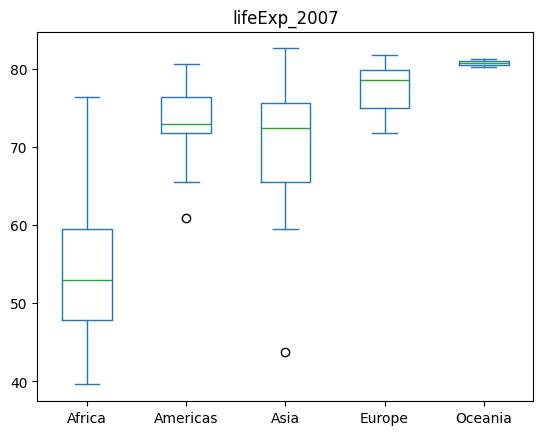

In [59]:
X.plot.box(column='lifeExp_2007', by='continent')

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 14
> Practice with the `hist` and `box` functions by exploring different columns in our DateFrame. Experiment with data filtering methods to refine your figures further. **Hint:** We can see all available columns with `print(X.columns)`.

In [58]:
### Experiment with code!


## Data visualization with `plotnine`

[`plotnine` is a popular data visualization library](https://plotnine.readthedocs.io/) that implements the Grammar of Graphics paradigm and [ggplot](https://ggplot2.tidyverse.org/) syntax in Python. For more information and exercises using `plotnine`, check out the [04_more_data_visualization.ipynb](04_more_data_visualization.ipynb) notebook.

Here, we want to demonstrate how the plots created above using `pandas` can also be made using `plotnine`.

In [62]:
import plotnine as p9

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.


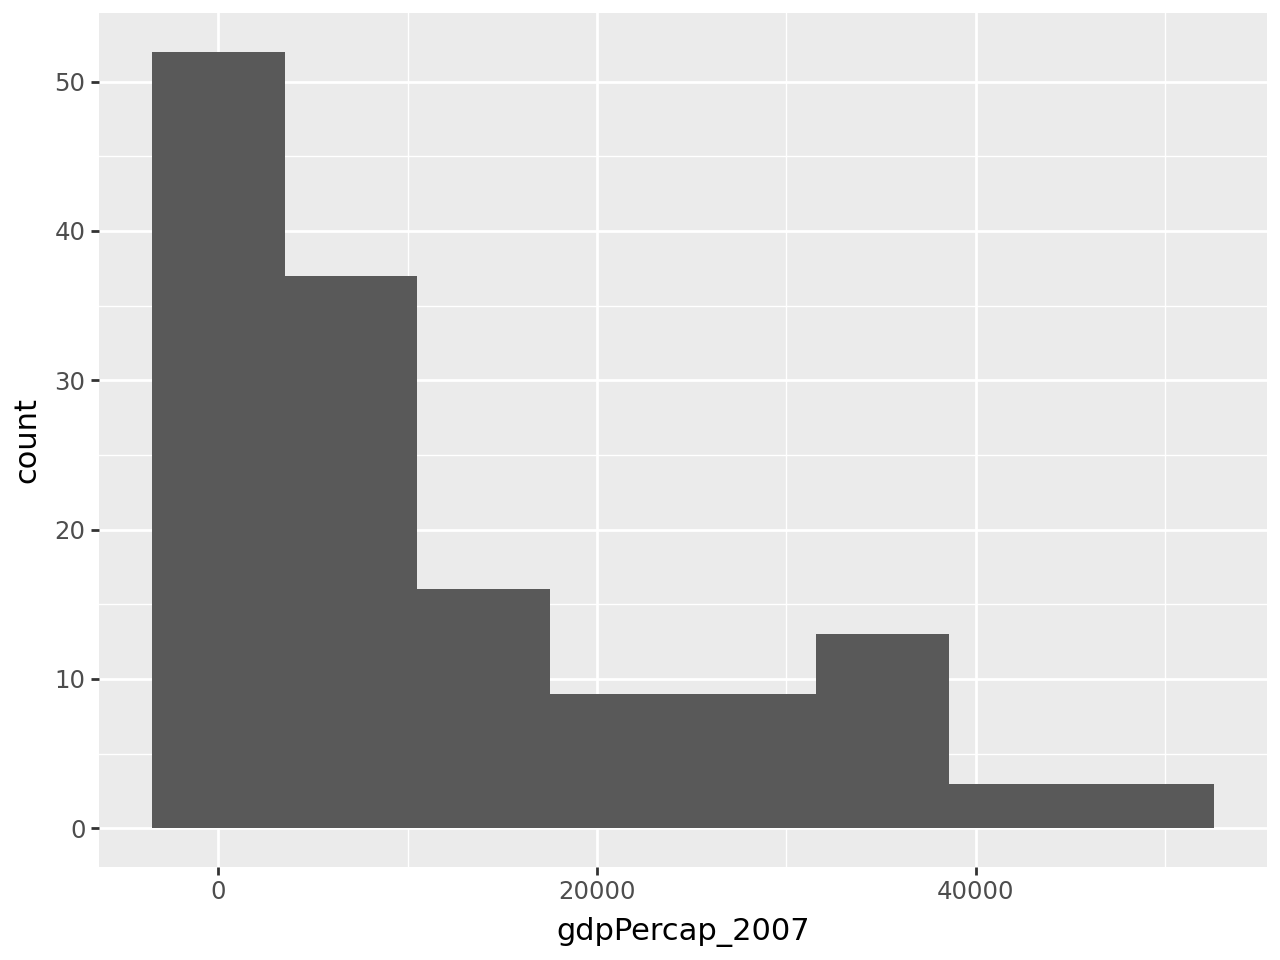

In [64]:
# plotnine implementation of the first histogram from above.
(p9.ggplot(X, p9.aes(x='gdpPercap_2007'))
 + p9.geom_histogram()
)

Not a bad start.

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 15

When you ran the code above, you should have gotten a warning:`PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.`

Use the [`plotnine` documentation](https://plotnine.readthedocs.io/) to:

* Change the `binwidth` to another value you think would be good.
* Change the color of the bars to something more colorful.
* Change the x-axis to "Gross Domestic Product Per Capita, 2007."
* Make any other changes you want to make to this histogram.


And here's the boxplot we made above.

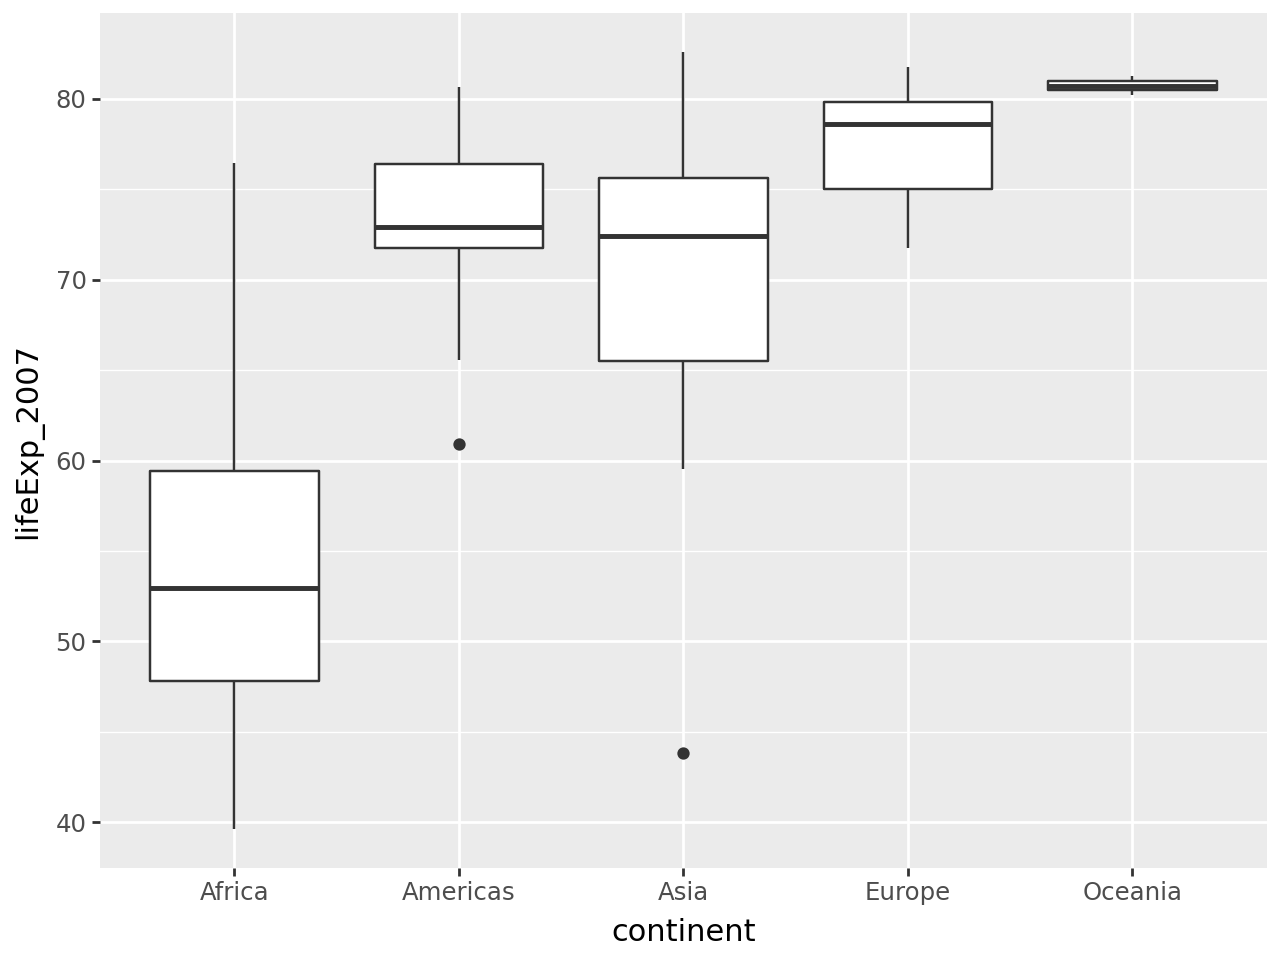

In [65]:
(p9.ggplot(X)
    + p9.geom_boxplot(p9.aes(x='continent', y='lifeExp_2007'))
 )

### <img src='https://github.com/python1999e/photon54/blob/main/images/exercise_icon.svg?raw=1' alt="Exercise icon" width=40 align=center> Exercise 16

Again, this is an excellent start. Explore `plotnine` to see what you can do to improve this!

***
#### Attribution
Some content in this learning experience was adapted from Ben Shickel's [AI for Medicine bootcamp](https://github.com/gatorai/scripps) content.  